<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 【Problem 1 】 Understanding the content of the competition

Please read the competition overview page and report on what kind of competition "Home Credit Default Risk" is from the following perspectives.

What kind of company is Home Credit?
R: Home Credit is an international consumer finance provider with operations in multiple European and Asian countries. That focus on lending primarily to people with little or no credit history.Established in 1997 as a non-banking lender in Czech Republic

What do you predict for this competition?
R: Predict how capable each applicant is of repaying a loan

What benefits can companies gain from predicting this?
R: They can carefully cater to those in need and create appropiate services for the appropiate people.

##### 【Problem 2 】 Understanding data overview

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75700 entries, 0 to 75699
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(104), int64(2), object(16)
memory usage: 70.5+ MB


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,75700.000000,75700.000000,75699.000000,7.569900e+04,7.569900e+04,75694.000000,7.563600e+04,75699.000000,75699.000000,75699.000000,...,75699.000000,75699.000000,75699.000000,75699.00000,65586.000000,65586.000000,65586.000000,65586.000000,65586.000000,65586.000000
mean,143900.649432,0.080291,0.417060,1.695137e+05,5.986434e+05,27077.762300,5.380433e+05,0.020861,-16038.243715,63427.870976,...,0.008243,0.000674,0.000436,0.00033,0.006953,0.007471,0.033361,0.268823,0.265041,1.886470
std,25307.603982,0.271744,0.722493,4.357523e+05,4.014070e+05,14467.199609,3.687981e+05,0.013794,4367.607419,140962.797073,...,0.090418,0.025948,0.020875,0.01817,0.087734,0.108237,0.200898,0.924070,0.612589,1.873602
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122067.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16474.500000,2.385000e+05,0.010006,-19678.000000,-2776.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143843.000000,0.000000,0.000000,1.476000e+05,5.130000e+05,24907.500000,4.500000e+05,0.018850,-15770.000000,-1217.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,165795.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12390.000000,-289.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,187779.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.00000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


##### 【Question 3】Project setting

## Simplified EDA Challenges and Questions:

**1. Understanding the Loan Outcome (Target):**

* **Challenge:** See how many loans were "good" (paid back) and how many were "bad" (not paid back).
* **Questions:**
    * How many times does "TARGET" equal 0 (good loan) and 1 (bad loan)?
    * Is there a lot more of one type than the other?

**2. Looking at Income and Loan Amount:**

* **Challenge:** Get a general idea of income and loan amounts.
* **Questions:**
    * What is the average income (`AMT_INCOME_TOTAL`)?
    * What is the average loan amount (`AMT_CREDIT`)?
    * What are the highest and lowest income and loan values?

**3. Checking for Missing Information:**

* **Challenge:** Find columns where some information is missing.
* **Questions:**
    * Which columns have missing data?
    * Are there many missing values, or just a few?

**4. Age of Loan Applicants:**

* **Challenge:** Understand the ages of people applying for loans.
* **Questions:**
    * How old are the loan applicants on average (using `DAYS_BIRTH`)? (Remember to convert from days to years).
    * What is the age range of the applicants?

**5. Simple Relationships:**

* **Challenge:** See if there's a basic link between income and loan outcome.
* **Questions:**
    * Does higher income seem to mean a loan is more likely to be paid back? (Look at average income for TARGET=0 and TARGET=1).
    * Does a higher loan amount mean a loan is more likely to be paid back?

1. Understanding the Loan Outcome (Target):

1. Loan Outcome Distribution:
TARGET
0    69622
1     6078
Name: count, dtype: int64




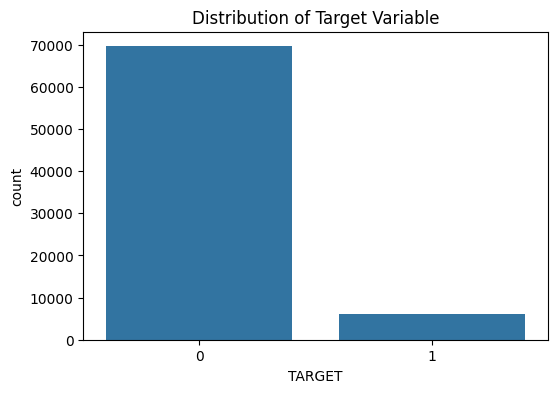

In [9]:
print("1. Loan Outcome Distribution:")
print(df['TARGET'].value_counts())
print("\n")

plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Target Variable')
plt.show()


2. Looking at Income and Loan Amount:

In [10]:
print("2. Income and Loan Amount Statistics:")
print(f"Average Income: {df['AMT_INCOME_TOTAL'].mean()}")
print(f"Average Loan Amount: {df['AMT_CREDIT'].mean()}")
print(f"Max Income: {df['AMT_INCOME_TOTAL'].max()}")
print(f"Min Income: {df['AMT_INCOME_TOTAL'].min()}")
print(f"Max Credit: {df['AMT_CREDIT'].max()}")
print(f"Min Credit: {df['AMT_CREDIT'].min()}")
print("\n")

2. Income and Loan Amount Statistics:
Average Income: 169513.6943211271
Average Loan Amount: 598643.3602425396
Max Income: 117000000.0
Min Income: 25650.0
Max Credit: 4050000.0
Min Credit: 45000.0




3. Checking for Missing Information:

3. Missing Value Counts:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                1
CODE_GENDER                       1
FLAG_OWN_CAR                      1
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     10114
AMT_REQ_CREDIT_BUREAU_WEEK    10114
AMT_REQ_CREDIT_BUREAU_MON     10114
AMT_REQ_CREDIT_BUREAU_QRT     10114
AMT_REQ_CREDIT_BUREAU_YEAR    10114
Length: 122, dtype: int64




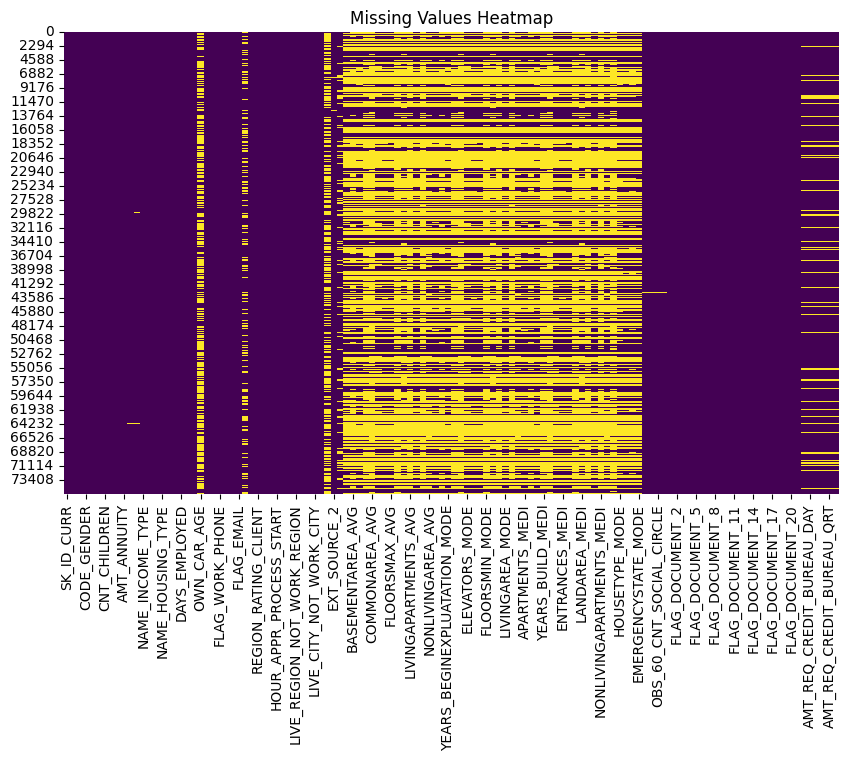

In [11]:
print("3. Missing Value Counts:")
print(df.isnull().sum())
print("\n")

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


4. Age of Loan Applicants:

4. Age Statistics:
Average Age: 43.94039374038527
Age Range: 21.03013698630137 - 69.04383561643836




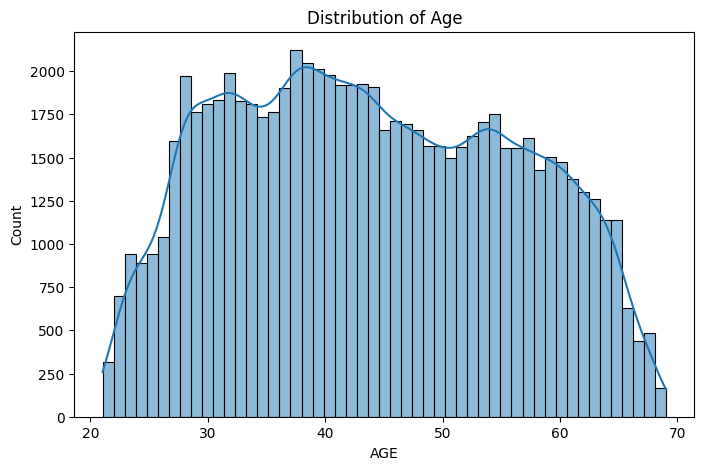

In [12]:
print("4. Age Statistics:")
df['AGE'] = df['DAYS_BIRTH'] / -365  # Convert days to years
print(f"Average Age: {df['AGE'].mean()}")
print(f"Age Range: {df['AGE'].min()} - {df['AGE'].max()}")
print("\n")

#Visualize age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age')
plt.show()

 5. Simple Relationships:

5. Income vs. Target:
TARGET
0    168613.919994
1    179820.240622
Name: AMT_INCOME_TOTAL, dtype: float64


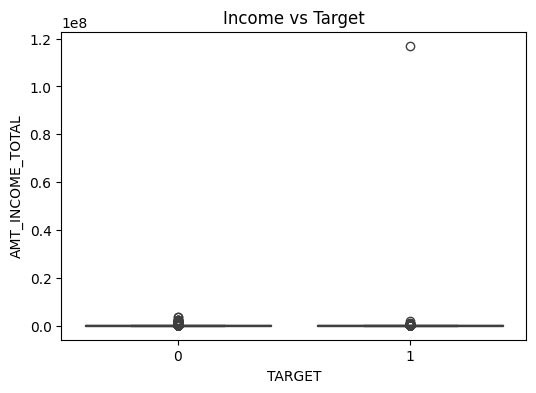


Credit vs Target:
TARGET
0    602462.179838
1    554900.346249
Name: AMT_CREDIT, dtype: float64


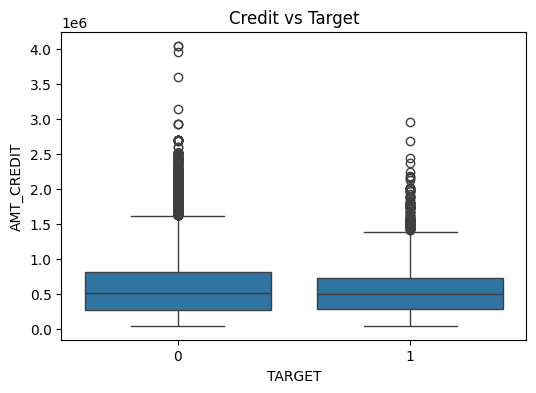

In [13]:
# 5. Simple Relationships:

# Income vs. Target
print("5. Income vs. Target:")
print(df.groupby('TARGET')['AMT_INCOME_TOTAL'].mean())

# Visualize Income vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.title('Income vs Target')
plt.show()

# Credit vs Target
print("\nCredit vs Target:")
print(df.groupby('TARGET')['AMT_CREDIT'].mean())

# Visualize Credit vs Target
plt.figure(figsize=(6, 4))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df)
plt.title('Credit vs Target')
plt.show()
